In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
data = pd.read_csv("/home/adeel/Desktop/DataScience/Dataset/googleplaystore.csv")
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
# Remove a column if the null values are greater than 20%

In [112]:
import missingno as msno

<AxesSubplot:>

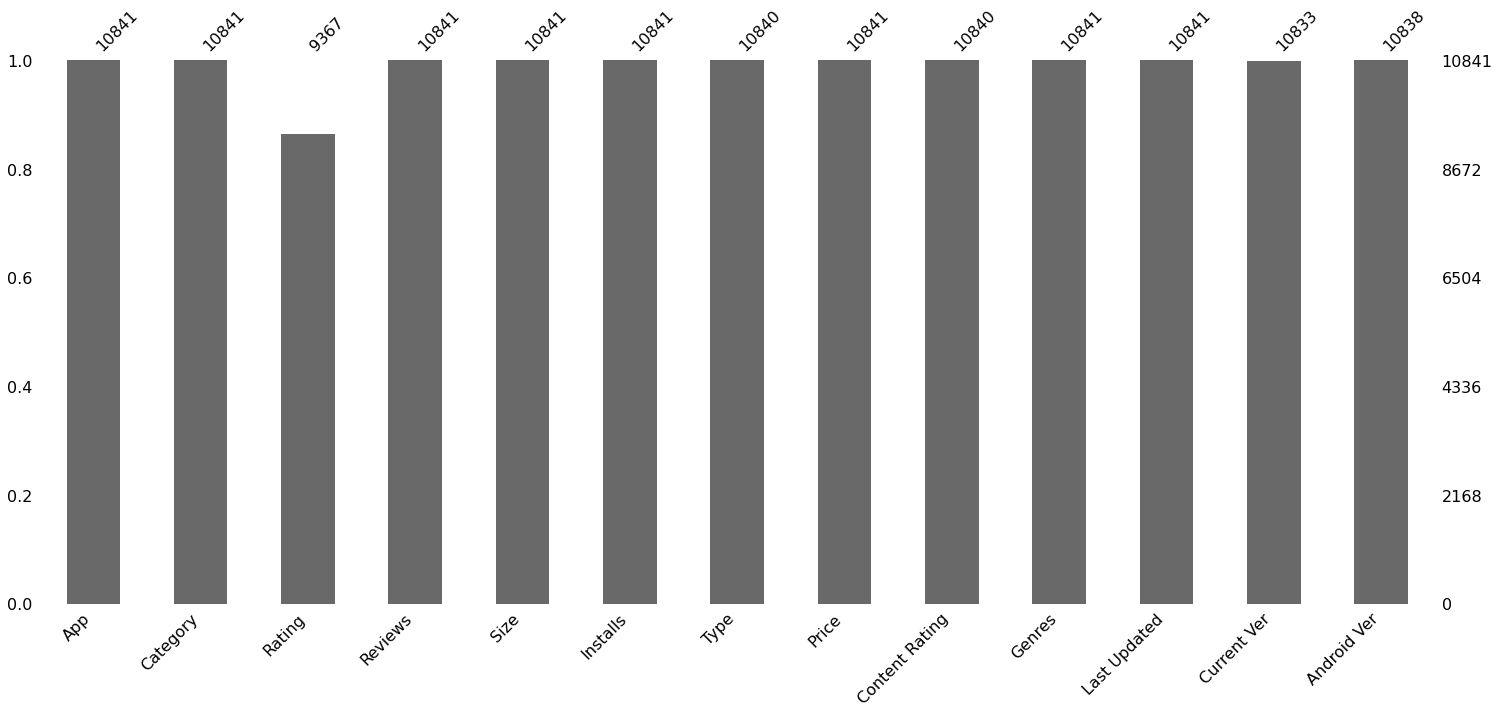

In [113]:
msno.bar(data)

<AxesSubplot:>

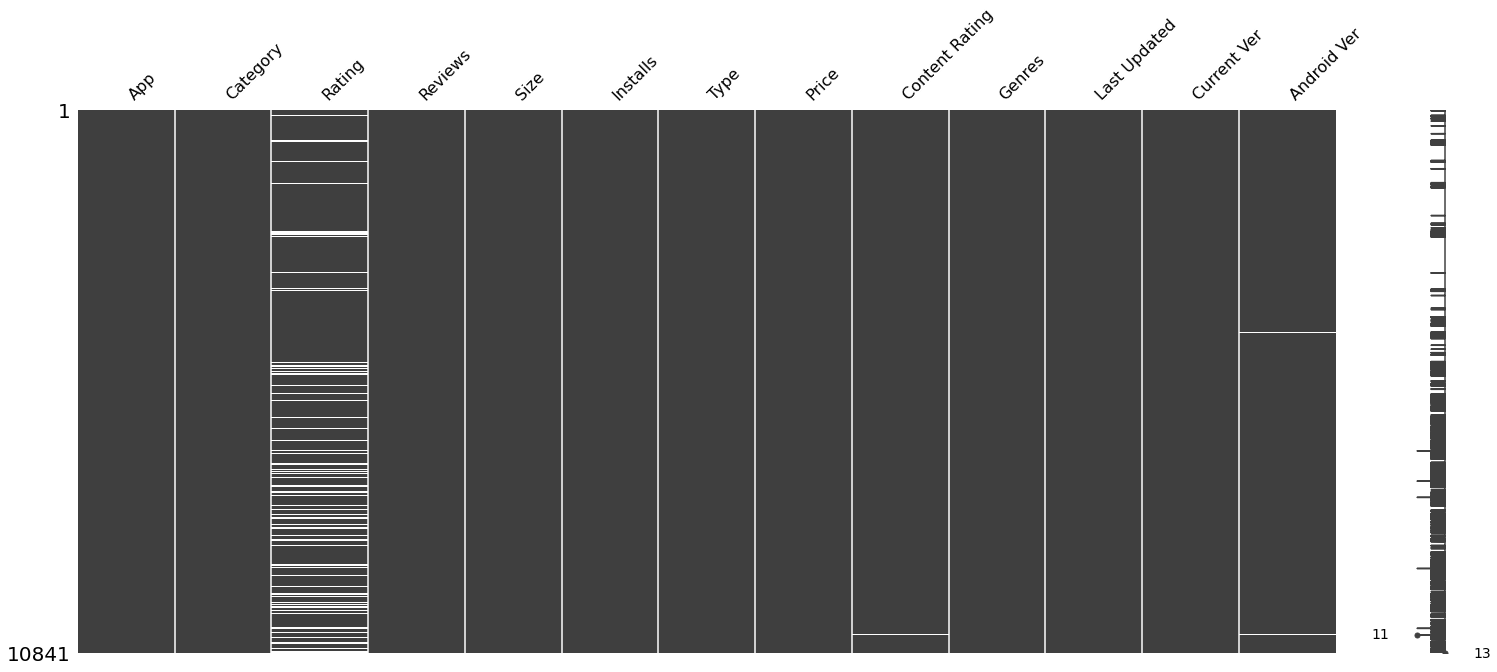

In [114]:
msno.matrix(data)

In [115]:
missVal = data.isnull().sum()
missVal = missVal[missVal>0]
missVal

Rating            1474
Type                 1
Content Rating       1
Current Ver          8
Android Ver          3
dtype: int64

In [116]:
(missVal / data.shape[0])*100

Rating            13.596532
Type               0.009224
Content Rating     0.009224
Current Ver        0.073794
Android Ver        0.027673
dtype: float64

In [118]:
l = list(data.iloc[10472])
l.insert(1,"COM")
l=l[:-1]
data.iloc[10472] = l

In [119]:
data["Installs"] = (data["Installs"].str.replace(",","")).str.replace("+","")
data["Installs"] = data["Installs"].astype(int)

/tmp/ipykernel_78473/2667911346.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["Installs"] = (data["Installs"].str.replace(",","")).str.replace("+","")


In [121]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   App             9360 non-null   object
 1   Category        9360 non-null   object
 2   Rating          9360 non-null   object
 3   Reviews         9360 non-null   object
 4   Size            9360 non-null   object
 5   Installs        9360 non-null   int64 
 6   Type            9360 non-null   object
 7   Price           9360 non-null   object
 8   Content Rating  9360 non-null   object
 9   Genres          9360 non-null   object
 10  Last Updated    9360 non-null   object
 11  Current Ver     9360 non-null   object
 12  Android Ver     9360 non-null   object
dtypes: int64(1), object(12)
memory usage: 1023.8+ KB


In [122]:
data["Rating"] = data["Rating"].astype(float)

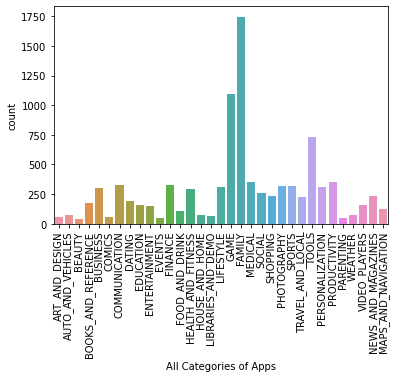

In [123]:
sns.countplot(x = "Category",data=data,)
plt.xticks(rotation = 90)
plt.xlabel("All Categories of Apps")
plt.show()

In [124]:
applications = data["App"].unique()
applications

array(['Photo Editor & Candy Camera & Grid & ScrapBook',
       'Coloring book moana',
       'U Launcher Lite – FREE Live Cool Themes, Hide Apps', ...,
       'Fr. Mike Schmitz Audio Teachings',
       'The SCP Foundation DB fr nn5n',
       'iHoroscope - 2018 Daily Horoscope & Astrology'], dtype=object)

In [125]:
len(applications)

8190

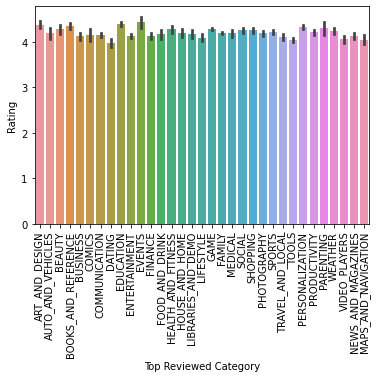

In [126]:
sns.barplot(x="Category", y="Rating", data=data)
plt.xticks(rotation = 90)
plt.xlabel("Top Reviewed Category")
plt.show()

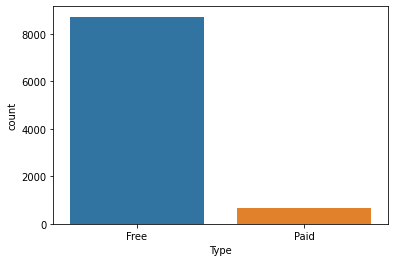

In [130]:
sns.countplot(x="Type",data=data)
plt.show()

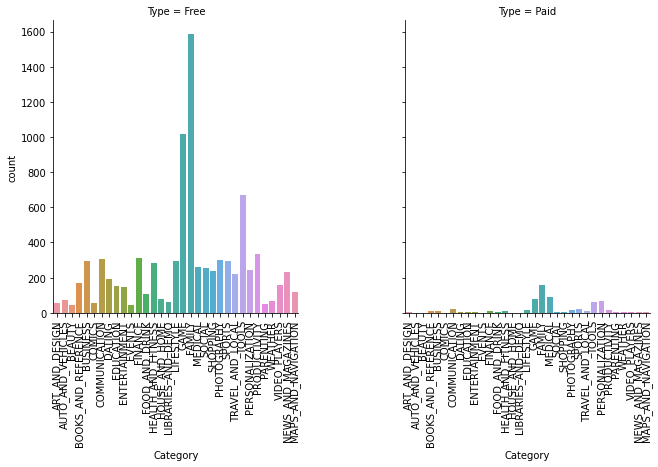

In [138]:
sns.catplot(x="Category",data = data, kind="count",col="Type").set_xticklabels(rotation = 90)
plt.xticks(rotation = 90)
plt.show()